In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import matplotlib.pyplot as plt
import numpy as np

In [2]:
import datetime as dt

def date_parser(d_bytes):
    s = d_bytes.decode('utf-8')
    return dt.datetime.strptime('1970 ' + s, '%Y %H:%M:%S:%f').timestamp()

measurments1 = np.genfromtxt(
    'power-no-delays.csv', 
    delimiter=';',
    names=['v','i','t'], 
    dtype=('float,float,float'),
    converters={2: date_parser}
)

zero_time = measurments1[0][2]
measurments1['t'] = list(map(lambda t: t - zero_time, measurments1['t']))

measurments2 = np.genfromtxt(
    'power-with-delays.csv', 
    delimiter=';',
    names=['v','i','t'], 
    dtype=('float,float,float'),
    converters={2: date_parser}
)

zero_time = measurments2[0][2]
measurments2['t'] = list(map(lambda t: t - zero_time, measurments2['t']))

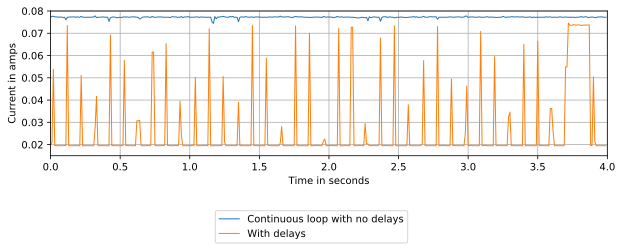

In [3]:

fig, ax = plt.subplots()

l1, l2 = ax.plot(
    measurments1['t'][:400], measurments1['i'][:400], 
    measurments2['t'][:400], measurments2['i'][:400],
    linewidth=1
)

fig.legend((l1, l2), ('Continuous loop with no delays', 'With delays'), 'lower center')

ax.set_xlabel("Time in seconds")
ax.set_ylabel("Current in amps")
ax.set_xlim(0, 4.0)
ax.set_ylim(0.015, 0.08)
ax.grid(True)
ax.set_aspect(16.0)

fig.set_size_inches(10, 4.5)

plt.show()